## Introduction to Scikit-Learn.
This Notebook takes us through the beautiful work of Scikit-Learn

### What we're going to cover
- An end to end workflow
- Getting the data ready
- Choosing the right estimator/algorithm for our problems
- fit the model/algorithm and use it to make predictions on our data
- Evaluate a model
- Improve a model
- Save and load a trained model
- Putting it all together

## Step One: An end to end workflow

In [1]:
#standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#we want to work on the heart_disease data set and see if we can predict if each patient has heart disease or not, (target =0 or 1

heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#get the feature axis(every other column that doesnt include prediction)
X = heart_disease.drop("target", axis=1)

#get the labels(the column that we want to model for ie "target")
y=heart_disease["target"]

In [4]:
#2 choose the right model and hyperparamters: hyperparameters are like dials on a model that you can tune to make it better or worse
from sklearn.ensemble import RandomForestClassifier #classification ML model
clf = RandomForestClassifier() 

#we'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [20]:
#3 fit the model to the training data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [21]:
#now fit it
clf.fit(X_train,y_train);

In [22]:
#make a prediction
y_label=clf.predict(np.array([0,2,3,4]))


C:\Users\TU7WRE\Desktop\Sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [24]:
y_preds=clf.predict(X_test)
y_preds

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [25]:
y_test

67     1
167    0
182    0
296    0
290    0
      ..
211    0
118    1
238    0
298    0
99     1
Name: target, Length: 61, dtype: int64

In [26]:
# 4. Evaluate the model on the training and test data
clf.score(X_train,y_train)


1.0

In [27]:
clf.score(X_test,y_test)

0.7704918032786885

### Some other metrics we can use rather than just accuracy

In [28]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        31
           1       0.74      0.83      0.78        30

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        31
           1       0.74      0.83      0.78        30

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [29]:
confusion_matrix(y_test,y_preds)

array([[22,  9],
       [ 5, 25]], dtype=int64)

In [30]:
accuracy_score(y_test,y_preds)

0.7704918032786885

In [33]:
#Let's say we are not happy and we want to improve the model (step 5)
# We can try another amount of n_estimators aka an hyperparameter
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set:{clf.score(X_test, y_test)*100:.2f}%")
    print("")

Trying model with 10 estimators..
Model accuracy on test set:75.41%

Trying model with 20 estimators..
Model accuracy on test set:78.69%

Trying model with 30 estimators..
Model accuracy on test set:80.33%

Trying model with 40 estimators..
Model accuracy on test set:80.33%

Trying model with 50 estimators..
Model accuracy on test set:80.33%

Trying model with 60 estimators..
Model accuracy on test set:78.69%

Trying model with 70 estimators..
Model accuracy on test set:83.61%

Trying model with 80 estimators..
Model accuracy on test set:77.05%

Trying model with 90 estimators..
Model accuracy on test set:80.33%



In [34]:
#6 save the model
import pickle
pickle.dump(clf, open("random_forest_model.pkl","wb"))

In [35]:
#load the model
loaded_model = pickle.load(open("random_forest_model.pkl","rb"))
loaded_model.score(X_test,y_test)

0.8032786885245902

In [37]:
import sklearn
sklearn.show_versions()

C:\Users\TU7WRE\Desktop\Sample_project_1\env\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



System:
    python: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\TU7WRE\Desktop\Sample_project_1\env\python.exe
   machine: Windows-10-10.0.19043-SP0

Python dependencies:
          pip: 21.2.4
   setuptools: 61.2.0
      sklearn: 1.0.2
        numpy: 1.22.3
        scipy: 1.7.3
       Cython: None
       pandas: 1.4.2
   matplotlib: 3.5.1
       joblib: 1.1.0
threadpoolctl: 2.2.0

Built with OpenMP: True


## Getting our data ready

Three things we want to look at
- Splitting the data into features and labels ('X' or 'y')
- filling(also called imputing) or disregarding missing values
- converting non numerical values to numerical values (also calledfeature encoding)

In [5]:
#getting the data ready
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#X is the features column: used for prediction
X = heart_disease.drop("target", axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
# y is the label column: what we want to predict
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [9]:
#Next is splitting our data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [11]:
X.shape

(303, 13)

In [12]:
len(heart_disease)

303

In [6]:
#lets try for an extended car data.
car_sales_extended = pd.read_csv("car-sales-extended.csv")
car_sales_extended.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [7]:
#split the data
X=car_sales_extended.drop("Price",axis=1)
y=car_sales_extended["Price"]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [9]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [10]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

model=RandomForestRegressor()

model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Nissan'

In [11]:
#Nissan is not numeric so we need to categorize the columns that are not numeric to be numeric
#in order to train and test our data for the model
#we'll use onehotencoder: a way to turn categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]

one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,
                               categorical_features)],
                             remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [22]:
#recalling our split features matrix column 
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [24]:
#making a dataframe of the OneHotEncoder 
dataframe=pd.DataFrame(transformed_X,columns=["BMW","Honda","Nissan","Toyota","Black","Blue","Green","Red","White","D_3","D_4","D_5","Odometer (KM)"])
dataframe.head()

,BMW,Honda,Nissan,Toyota,Black,Blue,Green,Red,White,D_3,D_4,D_5,Odometer (KM)
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [45]:
(dataframe["BMW"].value_counts()), (dataframe["Honda"].value_counts())

(0.0    900
 1.0    100
 Name: BMW, dtype: int64,
 0.0    696
 1.0    304
 Name: Honda, dtype: int64)

In [29]:
#buliding the Ml
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)

model=RandomForestRegressor()

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.3235867221569877

## Handling Mising Values 
- if we have missing values in our data we can either do two things
- 1. Fill them with some values (also known as imputations)
- 2. Remove the samples with mising data altogether

### Option 1. Handling missing data with Pandas

In [31]:
#imort a new csv file
car_sales_missing=pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [32]:
#using pandas
#check total number of missing data
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [34]:
#fill missing data for "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)
#fillmissing data for "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)
#fill missing datafor "Odometer" by inputing the mean
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
#fill missing data for doors: we'll input 4 
car_sales_missing["Doors"].fillna(4 , inplace=True)

In [35]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [36]:
#since we'll mostly be predicting labels we can remove the missing values for Price since its our label
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [37]:
#here we can see no missing values again
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

## Option 2: Handling missing Data with Scikit-learn

In [46]:
#import the data set again
car_missing=pd.read_csv("car-sales-extended-missing-data.csv")
car_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [47]:
#check for missing data
car_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [49]:
#remove missing data for "Price" and make it our label by splitting it
car_missing.dropna(subset=["Price"],inplace=True)

In [51]:
car_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [75]:
#split the data into features matrix and labels
X=car_missing.drop("Price", axis=1)
y=car_missing["Price"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [77]:
#now using scikit-learn to fill up missing values
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#categorise the features to fill
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant", fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

#define the columns
cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

#combine them together to fill the data with the column Transformer
imputer=ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)    
])

filled_X_train=imputer.fit_transform(X_train)
filled_X_test=imputer.fit_transform(X_test)

#view X_train
filled_X_train

array([['Toyota', 'Black', 4.0, 86696.0],
       ['Toyota', 'Black', 4.0, 20714.0],
       ['Toyota', 'White', 4.0, 134415.0],
       ...,
       ['Honda', 'Blue', 4.0, 224900.0],
       ['missing', 'White', 3.0, 19482.0],
       ['Honda', 'Blue', 4.0, 199833.0]], dtype=object)

In [80]:
#make a dataframe
car_filled_X_train=pd.DataFrame(filled_X_train, columns=["Make","Colour","Doors","Odometer (KM)"])
car_filled_X_train.head()

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Black,4.0,86696.0
1,Toyota,Black,4.0,20714.0
2,Toyota,White,4.0,134415.0
3,Toyota,Green,4.0,130710.230137
4,Honda,White,4.0,145850.0


In [86]:
#check for missing values
car_filled_X_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [83]:
car_filled_X_test=pd.DataFrame(filled_X_test, columns=["Make","Colour","Doors","Odometer (KM)"])
car_filled_X_test.head()

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Red,4.0,133195.0
1,BMW,White,5.0,37513.0
2,Toyota,White,4.0,28809.0
3,Nissan,White,4.0,82429.0
4,Nissan,White,4.0,234161.0


In [87]:
car_filled_X_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [85]:
#lets model our data but first we have to turn non numerical to numerical using onehotencoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]

one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,
                               categorical_features)],remainder="passthrough")
transformed_X_train=transformer.fit_transform(car_filled_X_train)
transformed_X_test=transformer.fit_transform(car_filled_X_test)

#view x train
traformed_X_train.toarray()

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.66960e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.07140e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.34415e+05],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.24900e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.94820e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.99833e+05]])

In [88]:
#build the model
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

model=RandomForestRegressor()

model.fit(transformed_X_train,y_train)
model.score(transformed_X_test,y_test)

0.10029498332004949

- If you are working on a machine learning problem and not sure what model to use:
- you should refer to the ML Model map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## Picking a machine learning model for a regression problem
lets use the california housing dataset from sklearn

In [32]:
#Getcalifornia housing data
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [33]:
#lets get the dataframe
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [34]:
len(housing_df)

20640

In [35]:
housing_df["MedHouseVal"]=housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [36]:
#i want to use target instead of "MedHouseVal"
housing_df["target"]=housing_df["MedHouseVal"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.847


In [37]:
#removing "MedHouseVal" column
housing_df=housing_df.drop("MedHouseVal",axis=1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Beautiful, our goal here is to use the feature columns, such as:

MedInc - median income in block group
HouseAge - median house age in block group
AveRooms - average number of rooms per household
AveBedrms - average number of bedrooms per household.

To predict the target column which expresses the median house value for specfici California districts in hundreds of thousands of dollars ($100,000).

In [104]:
#split the data 
X = housing_df.drop("target", axis=1)
y= housing_df["target"]

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [106]:
#import the ridge model for 
from sklearn.linear_model import Ridge

#set up random seed
np.random.seed(42)

#Initaiate and fit the model
model=Ridge()

model.fit(X_train,y_train)
model.score(X_test,y_test)


0.5783803894004866

Well how can we improve this model, with linear_model.ridge() we have a 57% prediction analysis,
lets try another model.

In [107]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

model=RandomForestRegressor()

model.fit(X_train,y_train)

model.score(X_test,y_test)

0.8012774167558389

well we have 80% predictive analysis. This means that given the feature matrix(X), how predictive is it ofthe targetvalue. it shows from the RandomForestRegresor it can predict 80.12% of it.

NB:Random Forest is simply a collection of Decision trees whose results are aggregated into one final result

## Choosing the right model for your data (Classification)

In [3]:
#lets load the dataset again for heart disease
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### From the Scikit learn ML Map it says we can try Linear SVC estimator/algorithms for classification. Linear SVC are classes capable of performing multiclass classification on a data set

Linear SVC-Linear support Vector Classification

In [13]:
#import the Linear Svc 
from sklearn.svm import LinearSVC

#set up random seed
np.random.seed(42)

#get the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#instantiate the model
clf=LinearSVC()
clf.fit(X_train,y_train)

#evaluate the model
clf.score(X_test,y_test)

C:\Users\TU7WRE\Desktop\Sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

### lets try the ensemble method

In [16]:
#import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#set up random seed
np.random.seed(42)

#get the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#instantiate the model
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

#evaluate the model
clf.score(X_test,y_test)

0.8524590163934426

### TIDBIT
- if you have structured data, use Ensemble methods such as RandomForest.
- if you have unstructured data use deep learning or transfer learning.

In [ ]:
## Fit the model algorihm on our datatomake predictions
### 3.1 fitting the model to the data

In [ ]:
#import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#set up random seed
np.random.seed(42)

#get the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#instantiate the model
clf=RandomForestClassifier() #find patterns between X and y

#fit the model to the data
clf.fit(X_train,y_train)   #use the pattern the model has learned

#evaluate the model
clf.score(X_test,y_test)

In [18]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## 3.2 Making predictions with our model
we want to use the trained ML model to make some predictions
There are two ways
- `Predict()`
- `Predict_proba()`

lets start with predict

In [20]:
#use a trained model to make predictions
clf.predict(np.array([1,7,8,3,4])) #this wont work

C:\Users\TU7WRE\Desktop\Sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [21]:
#lets use X_test
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [22]:
len(X_test)

61

In [23]:
#check out result of X_test
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [24]:
#check out the corresponding y labels that we want to get
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

so we made predictions on our data with X_test and we can see the result as well as truth values of y_test

In [25]:
#compare predictions to truth labels to evaluatethe model
y_preds=clf.predict(X_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [26]:
#check that foe the clf score
clf.score(X_test,y_test)

0.8524590163934426

we can see that we get the same thing for both the two camprisons

In [29]:
#Another way
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

we still get the same thing!

## Making predictions with predict_proba()


In [30]:
#Predict_proba() returns the probabilities of a classification model
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [32]:
#lets predict on same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

so we can compare the results and see that predict_proba() is not just making predictions but giving probabilities of each label being true

In [34]:
#check the test data again
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


so for the first row (179) the probability of getting 0 (no heart disease) is 89% while that of 1 (getting heart disease)  is 11%

we can use predict_proba to check the confidence of our model and also to deploy it into production.
so `predict` would give you a simple label for each sample while `predict_proba()` wouuld the return the probabilities of the category of a classification label

## making predictions with regresion model
`predict()` can also be used for regression model

In [40]:
#load housing data
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [45]:
#set up the model
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=housing_df.drop("target", axis=1)
y=housing_df["target"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()

model.fit(X_train,y_train)

y_preds=model.predict(X_test)

In [48]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [49]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [50]:
#compare both of them
len(y_preds), len(y_test)

(4128, 4128)

lets evaluate the mean difference between the predicted and the true values by using evaluation metrics
1. Mean absolute error: average difference between the predicted values and true values

In [51]:
#compare the mean difference of prediction to truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32659871732073664

it ha an average mean difference of 0.33

## 4.0 Evaluating a Machine Learning model
The eason why we evaluate our model is to predict something and put it in application. If our model is making poor predictions, it will probably not be good for anyone using thatapplication. so we need to evaluate existing predictions

Three ways to evaluate Scikit-Learn models/estimators
-  Estimators built-in `score()` method
-  Scoring Parameter 
-  Problem Specific functiions

In [56]:
#using the heart_disease dataset
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 4.1 Evaluating a model with the `score()`method for classification

In [7]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop("target",axis=1)
y=heart_disease["target"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)

clf.score(X_train,y_train)

1.0

The highest value for the score method is 1.0 and lowest should be 0.0. the trained dataset was perfect because it has been exposed to the model.

In [63]:
#lets check the score on the test data set
clf.score(X_test,y_test)

0.8524590163934426

Alright! The model used the patterns and logic it has gotten from the exposure on the trained dataset to predict the values for the test set. The answers shouldn't be far apart for a good Sklearn model but however if you have a score of 1.0 on your test dataset you should be skeptical about it.

### 4.1.1 Evaluating a model with the `score()` method forRegression

In [64]:
#Load the housing_df data
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [66]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=housing_df.drop("target",axis=1)
y=housing_df["target"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()

model.fit(X_train,y_train)

RandomForestRegressor()

In [69]:
 model.score(X_test,y_test)

0.8065734772187598

the default score() evaluation metrics is the coefficient of determination i.e square of the correlation (r -squared) for regression. which is the correlation between the dependent variable(y) and the independent variable (X). the lowest value at 0.0 and the highest value is 1.0. This means that the closer the coefficient of determination is to 1.0, the stronger the linear relationship.


### 4.2 Evaluating a Machine learning model (Cross Validation)
When you get further into a problem its likely you want to start using some more powerful metric to evaluate model performance.

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop("target",axis=1)
y=heart_disease["target"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)


RandomForestClassifier()

In [71]:
#recall normal model score method
clf.score(X_test,y_test)

0.8524590163934426

In [73]:
#try using cross validation
cross_val_score(clf,X,y) #it takes classifier, X data and y data

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

What cross validation does is that, it trains 5 different version of our dataset and evaluates it on 5 different scores of our test data. this tends to be more accurate than the .score method

you can also train and test on 10 versions
- cross_val_score(clf,X,y,cv=10)  #but i wont run this

#### since we have 5 different score on our cross validation set its best we find the mean and compare it to the normal score result

In [77]:
#set up random seed
np.random.seed(42)

#get the normal score result
clf_single_score=clf.score(X_test,y_test)

#get the mean of the cross validation result score
clf_cross_val=np.mean(cross_val_score(clf,X,y))

#compare
clf_single_score, clf_cross_val

(0.8524590163934426, 0.8248087431693989)

We have a slightly lower result in the cross validation. But in terms of accuracy and reportingof model for use, its better to go with the cross validation

### 4.2.1 Evaluating a classification model 
- Accuracy
- Area under ROC curve
- Confusion matrix
- Classification report

**Accuracy**

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop("target",axis=1)
y=heart_disease["target"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)

cross_val_score=cross_val_score(clf,X,y)
cross_val_score

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [81]:
np.mean(cross_val_score)

0.811639344262295

In [82]:
print(f"Heart diesease cross validated accuracy:{np.mean(cross_val_score)*100:.2f}%")

Heart diesease cross validated accuracy:81.16%


**Area under the receiver operating characteristics (ROC)**
- Area under curve (AUC)
- ROC Curve
ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr)

* True positive: model predicts 1 when truth is 1
* True negative: model predicts 1 when truth is 0
* False positive: model predicts 0 when truth is 0
* False negative: model predicts 0 when truth is 1

In [85]:
from sklearn.metrics import roc_curve

#fit th data
clf.fit(X_train,y_train)

#make predictions with probabilities
y_probs=clf.predict_proba(X_test)

y_probs[:10],len(X_test)

(array([[0.92, 0.08],
        [0.36, 0.64],
        [0.52, 0.48],
        [0.9 , 0.1 ],
        [0.19, 0.81],
        [0.17, 0.83],
        [0.27, 0.73],
        [0.93, 0.07],
        [0.93, 0.07],
        [0.42, 0.58]]),
 61)

In [87]:
#True is 1 while false is 0

#get the positive data 1
y_probs_positive = y_probs[:,1]

y_probs_positive[:10]

array([0.08, 0.64, 0.48, 0.1 , 0.81, 0.83, 0.73, 0.07, 0.07, 0.58])

In [88]:
# calculate fpr,tpr and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

#check false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.06896552, 0.17241379, 0.17241379,
       0.20689655, 0.20689655, 0.34482759, 0.48275862, 0.48275862,
       0.55172414, 0.62068966, 0.75862069, 0.82758621, 0.89655172,
       1.        ])

Looking at this doesnt make much sense so what we can do is to plot the roc_curve

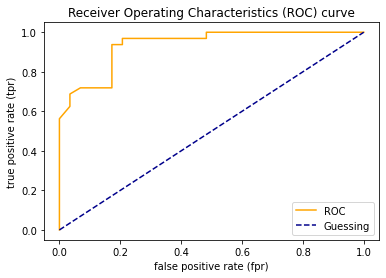

In [90]:
#create a function for the roc curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    
    """
   plot a roc curve given the false positive rate(fpr) and true positive rate(tpr) of a model
    """
    #plot the roc curve
    plt.plot(fpr,tpr,color="Orange",label="ROC")
    
    #plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--",label="Guessing")
    
    #customize the plot
    plt.xlabel("false positive rate (fpr)")
    plt.ylabel("true positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr);

In [91]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.9358836206896552

This value represents area under the curve

In [97]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


### Evaluating a Classification Model: Confusion Matrix
A confusion matrix is a quick way to compare the laels a model predicts and the actual labels it was supposed to predict. 


In [9]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [10]:
#visualise this confusion matrix with pd.crosstab
pd.crosstab(y_test,y_preds,
           rownames=["Actual labels"],
           colnames=["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,24,5
1,4,28


This means that where predicted labels is 0 and actual label is 0, we have 24 examples and so on

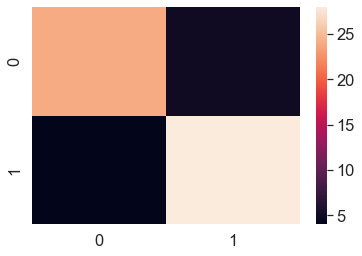

In [11]:
#make our visualization more visible with seaborn heatmaps

import seaborn as sns

#set font scale
sns.set(font_scale=1.5)

#create a confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)

#plot it using seaborn
sns.heatmap(conf_mat);

**creating a confusion matrix with scikit-learn**
you'll need at least sklearn version 1.0+

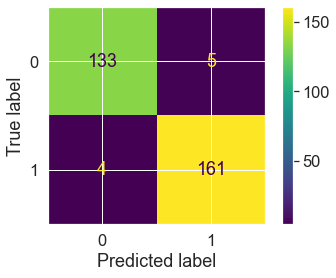

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

#option 1
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y);

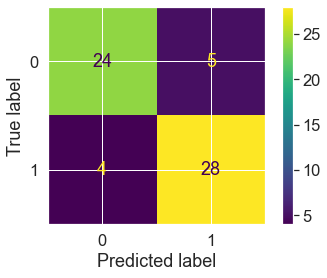

In [16]:
#option 2
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds);

**Classification Report**
Evaluating a model with classification report

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### 4.3 Evaluating a Regression Model
We'll use R squared(Coefficient of determination), Mean Absolute Error (MAE), Mean Squared Error(MSE)

using R squared: values can range from negative infinity (poor model) to 1.0

In [42]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=housing_df.drop("target", axis=1)
y=housing_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()

model.fit(X_train,y_train)

model.score(X_test,y_test)

0.8065734772187598

In [39]:
y_preds=model.predict(X_test)

In [40]:
r2_score(y_true=y_test,
        y_pred=y_preds)

0.8065734772187598

**Evaluating a Regression Model with MAE**:
MAE is the average of absolute differences between predictions and actual values. It gives you an idea of how wrong your model predictions are


In [41]:
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(X_test)

mean_absolute_error(y_true=y_test,
                    y_pred=y_preds)

0.32659871732073664

In [43]:
#lets make a dataframe to see our data on a tabular form
df=pd.DataFrame(data={"actual_values":y_test,
                      "predicted_values":y_preds})
df["differences"]=df["predicted_values"]-df["actual_values"]
df[:10]

,actual_values,predicted_values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [45]:
#to get the mean absolute difference
np.abs(df["differences"]).mean()

0.32659871732073803

**Mean Squared Error**: This is the mean of thesquareof the errors between actual and predicted values

In [46]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true=y_test,
                   y_pred=y_preds)
mean_squared_error()

0.2534678520824551

### 4.4 Evaluating a model with cross validation and Scoring Parameter


**using scoring parameter and cross_validation_score for classification**

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier()


In [20]:
#cross validation for accuracy
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y, scoring=None) #scoring = none sets the dafault parameter for the model
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [24]:
#cross validated mean for scoring=none
print(f"The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is:82.48%


In [26]:
#checking same default for accuracy = none for scoring
np.random.seed(42)
cv_accuracy=cross_val_score(clf,X,y, scoring="accuracy")
cv_accuracy

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [27]:
#cross validated accuracy
print(f"the cross validated accuracy is:{np.mean(cv_accuracy)*100:.2f}%")

the cross validated accuracy is:82.48%


**we can see that for scoring: None="accuracy" which is the default parameter**

In [22]:
#cross validation for precision
#precision: This is intuitevly the ability of the classifier model not to label as positivve, a model that is negative
np.random.seed(42)
cv_precision=cross_val_score(clf,X,y,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [23]:
#cross_validation precision mean
print(f"The cross validated precision is:{np.mean(cv_precision)*100:.2f}%")

The cross validated precision is:83.30%


In [30]:
#cross validation for recall
#Recall: Indicates the proportion of no actual positives which were correctly classified
np.random.seed(42)
cv_recall=cross_val_score(clf,X,y, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [31]:
#Cross_validation recall mean
print(f"The cross validated recall is:{np.mean(cv_recall)*100:.2f}%")

The cross validated recall is:85.45%


### Scoring Parameter and Cross validation score for a Regression Problem


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

np.random.seed(42)

X=housing_df.drop("target",axis=1)
y=housing_df["target"]

model=RandomForestRegressor()

In [47]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,scoring=None)
cv_r2

array([0.51682388, 0.70279716, 0.74197717, 0.61638204, 0.68243183])

In [54]:
#print mean for scoring
print(f"The mean for cv_mae is:{np.mean(cv_r2):.2f}")

The mean for cv_mae is:0.65


In [46]:
#cross validation for mean absolute error
np.random.seed(42)

cv_mae=cross_val_score(model,X,y,scoring="neg_mean_absolute_error")
cv_mae

array([-0.54256026, -0.40902123, -0.43706982, -0.46918522, -0.47318856])

In [53]:
#print mean for cv_mae
print(f"The mean for cv_mae is:{np.mean(cv_mae):.2f}")

The mean for cv_mae is:-0.47


In [49]:
#cross validation for mean squared error
np.random.seed(42)

cv_mse=cross_val_score(model,X,y,scoring="neg_mean_squared_error")
cv_mse

array([-0.51906271, -0.34789469, -0.37117373, -0.4500546 , -0.46274716])

In [55]:
#print mean for cv_mse
print(f"The mean for cv_mae is:{np.mean(cv_mse):.2f}")

The mean for cv_mae is:-0.43


### Evaluating a model with Scikit learn Finctions

**for classification**

In [74]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)

y_preds=clf.predict(X_test)

print("Classificaton Metrics values are as follows")
print(f"Accuracy is: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision is: {precision_score(y_test,y_preds):.2f}")
print(f"Recall is: {recall_score(y_test,y_preds):.2f}")
print(f"F1 score is: {f1_score(y_test,y_preds):.2f}")

Classificaton Metrics values are as follows
Accuracy is: 85.25%
Precision is: 0.85
Recall is: 0.88
F1 score is: 0.86


**for regression**


In [79]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=housing_df.drop("target",axis=1)
y=housing_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()

model.fit(X_train,y_train)

y_preds=model.predict(X_test)

print("Regression Metric values are as follows")
print(f"R2_score is:{r2_score(y_test,y_preds)*100:.2f}%")
print(f"MAE score is:{mean_absolute_error(y_test,y_preds):.2f}")
print(f"MSE score is: {mean_squared_error(y_test,y_preds):.2f}")

Regression Metric values are as follows
R2_score is:80.66%
MAE score is:0.33
MSE score is: 0.25


### 5.Improving a Model
Usually the first predictions or models you build wont be the last you can always improve them
first predictions=baseline predictions

1. first step of improving, from a data perspective:
    * could we collect more data? (generally, the more data, the better)
    * could we improve our existing data (depth of information)
    
    
2. From a model perspective:
    * is there a better model to use (sklearn map)
    * could we improve the hyperparameters of current model to make it better
    
Hyperparameter vs Parameter
- Parameters= model finds these patterns in our data
- hyperparameters = settings on a model that we can adjust to improve ability to find patterns

Three ways to adjust Hyperparameters:
- By hand
- Randomly with RandomSearchCV
- Exhaustively with GridSearchCV

In [81]:
#how to see our hyper parameters with an example
from sklearn.ensemble import RandomForestRegressor

clf=RandomForestRegressor()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**All these are examples of Hyperparameters**

## 6.1 Tuning Hyperparameters

**6.1.1 Tuning hyperparameters by hand**

prameter by hand we split the data into training, validation and test

In [7]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**We want to tune** 
`max_depth`,`max_features`,`min_samples_leaf`,`min_samples_split`,`n_estimators`

In [9]:
#define a function for evaluation
def evaluation_metrics(y_true,y_preds):
    """
    performs the comparison between the y_true labels and y_preds labels on a classification model
    """
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    
    metric_dict={
        "accuracy":round(accuracy, 2),
        "precision":round(precision, 2),
        "recall":round(recall, 2),
        "f1":round(f1, 2)
    }
    print(f"Accuracy:{accuracy*100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1:{f1:.2f}")
    
    return metric_dict
    

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#set up random seed
np.random.seed(42)

#shuffle the data
heart_disease_shuffled=heart_disease.sample(frac=1)

#split the data
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

#get the train, test, validation
train_split=round(0.7 * len(heart_disease_shuffled)) #70% of the data
valid_split=round(train_split + 0.15 * len(heart_disease_shuffled)) 
X_train, y_train= X[:train_split],y[:train_split]
X_valid, y_valid= X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test= X[valid_split:], y[valid_split:]

#set up the model
clf=RandomForestClassifier()

#fit the model
clf.fit(X_train,y_train)

#make prediction
y_preds=clf.predict(X_valid)

baseline_metrics=evaluation_metrics(y_valid,y_preds)

baseline_metrics

Accuracy:82.22%
Precision:0.81
Recall:0.88
F1:0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [18]:
#whatif i was to improve this model
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

let's tune `max_depth`

In [12]:
np.random.seed(42)

clf_2=RandomForestClassifier(max_depth=10)

clf.fit(X_train,y_train)

clf.predict(X_valid)

tuned_metrics=evaluation_metrics(y_valid,y_preds)

tuned_metrics

Accuracy:82.22%
Precision:0.81
Recall:0.88
F1:0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

### 6.1.2 Tuning Hyperparameters with RandomSearchCV
Scikit-Learn's `RandomizedSearchCV` allows us to randomly search across different hyperparameters to see which work best. It also stores details about the ones which work best!

Let's see it in action.

FIRST, we create a grid dictionary to group the parameters and their values

In [5]:
#lets group the hyperparameters by a grid
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

In [6]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier(n_jobs=1)

rs_clf=RandomizedSearchCV(estimator=clf,
                         param_distributions=grid,
                         n_iter=20, #try 20 models total
                         cv=5,#cross validation samples=5
                         verbose=2 #print out results
                        )
rs_clf.fit(X_train,y_train)
    
    

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   2.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.1s
[CV] END max_depth=20, max_features

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [7]:
#finding the best hyperparameter
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10}

we would use the best parameter found. When we call the `predict()` function it automatically gives us the best parameter


In [13]:
rs_y_preds=rs_clf.predict(X_test)

rs_metrics=evaluation_metrics(y_test,rs_y_preds)

Accuracy:91.30%
Precision:0.92
Recall:0.92
F1:0.92


### Using GridSearchCV

Make a new grid probably by the influence of the RandomizedSerachCV result

In [14]:
grid_2={"n_estimators": [100, 200, 500],
        "max_depth": [None],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [ 6],
        "min_samples_leaf": [1, 2,]}

In [15]:
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease_shuffled.drop("target", axis=1)
y=heart_disease_shuffled["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier(n_jobs=1)

gs_clf=GridSearchCV(estimator=clf,
                    param_grid=grid_2,
                    cv=5,
                    verbose=2)
gs_clf.fit(X_train,y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [16]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [17]:
gs_y_preds=gs_clf.predict(X_test)

gs_metrics=evaluation_metrics(y_test,gs_y_preds)

Accuracy:78.69%
Precision:0.74
Recall:0.82
F1:0.78


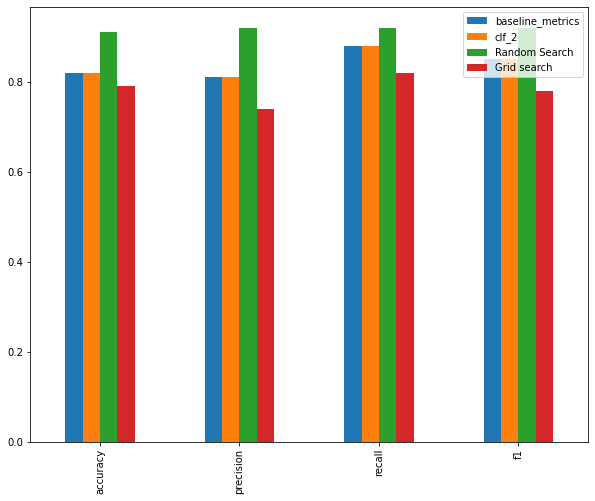

In [18]:
#comparing all the hyperparameters tuned

compare_metrics=pd.DataFrame({"baseline_metrics": baseline_metrics,
                              "clf_2": tuned_metrics,
                              "Random Search":rs_metrics,
                              "Grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

### Save and load a model

There are two ways to do it:
- with python's `pickle` method
- with `joblib` method

**PICKLE**

In [20]:
import pickle

#save an existing model to file
pickle.dump(gs_clf,open("gs_random_forest_model.pkl","wb"))

In [22]:
#load the model
loaded_pickel_model=pickle.load(open("gs_random_forest_model.pkl", "rb"))

In [23]:
#make some predictions
pickle_y_preds=loaded_pickel_model.predict(X_test)

evaluation_metrics(y_test,pickle_y_preds)

Accuracy:78.69%
Precision:0.74
Recall:0.82
F1:0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**JOBLIB**

In [25]:
from joblib import dump,load

#dump the data
dump(gs_clf, filename="gs_random_forest_model.joblib")

['gs_random_forest_model.joblib']

In [26]:
#load a saved joblib model
loaded_joblib=load(filename="gs_random_forest_model.joblib")

In [27]:
#make predictions with joblib model
joblib_y_preds=loaded_joblib.predict(X_test)

evaluation_metrics(y_test, joblib_y_preds)

Accuracy:78.69%
Precision:0.74
Recall:0.82
F1:0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

### Putting it all together

To do this we are going to use the sklearn pipeline.


In [29]:
#using our trusty car sales data to solve a regression problem
data=pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


**using sklearn pipeline**

In [30]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

In [31]:
#Using grid search with pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto", "sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samp

[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.7s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.7s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__n

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.5s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer_

[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [33]:
#score the best model
gs_model.score(X_test,y_test)

0.292308819012865